# Homework 1
Christian Steinmetz | Machine Learning  | October 18th

Generate a dataset of two-dimensional points, and choose a random line in the
plane as your target function $f$, where one side of the line maps to $+1$ and the other
side to $−1$. Let the inputs $\mathbf{x}_{n} \in \mathbb{R}^{2}$ be random points in the plane, and evaluate the
target function $f$ on each $\mathbf{x}_{n}$ to get the corresponding output $y_{n} = f(\mathbf{x}_{n})$.
Experiment with the perceptron algorithm in the following settings:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300 
%config InlineBackend.figure_format = 'retina'

pColor = 'b'
nColor = 'r'

In [2]:
def test_convergence(w, x, y):
    for x_n, y_n in zip(x, y):
        
        x_n = np.insert(x_n, 0, 1)
        
        if y_n > 0 and np.dot(w, x_n) < 0:
            return False

        if y_n < 0 and np.dot(w, x_n) >= 0:
            return False

    return True

### a. 
Generate a dataset of size $20$. Plot the examples $\{(\mathbf{x}_{n}, y_{n})\}$ as well as the target
function $f$ on a plane.

In [3]:
# generate a dataset of points in 2D space from -1 to 1
N = 20
x = (np.random.rand(N,2) * 2) - 1

In [4]:
# create a "random" target function
w_t = [0, 0.5, -0.5]
def target(x_n):
    return 1 if np.dot(w_t,np.insert(x_n, 0, 1)) >= 0 else -1

In [5]:
# create vector of y values (labels) with target function
y = [target(x_n) for x_n in x]

[-1.25, 1.25, -1.25, 1.25]

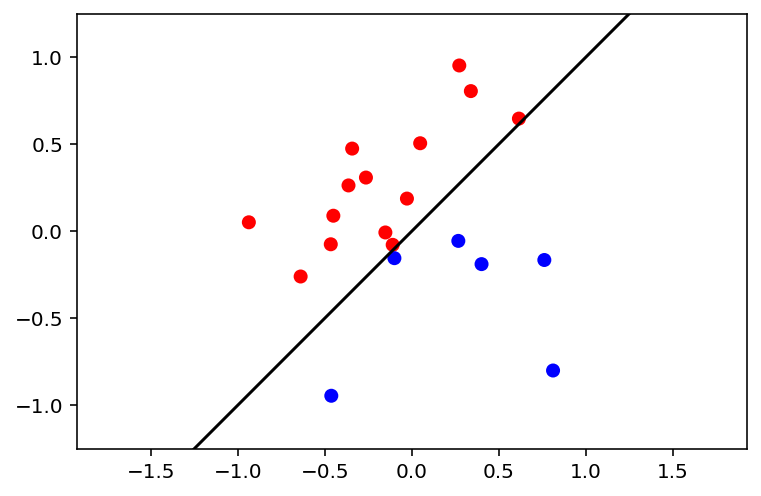

In [6]:
plt.scatter(x[:,0], x[:,1], c=[pColor if y_n >= 0 else nColor for y_n in y]) # plot the points in the dataset
plt.plot(np.linspace(-2,2,50), -(w_t[1]/w_t[2]) * (np.linspace(-2,2,50) -(w_t[0]/w_t[2])), c='k')
plt.axis('equal')
plt.axis([-1.25, 1.25, -1.25, 1.25])


### b.
Run the perceptron algorithm on the dataset. Report the number of updates
that the algorithm takes before converging. Plot the examples { $\{(\mathbf{x}_{n}, y_{n})\}$, the
target function $f$ , and the final hypothesis $g$ in the same figure.

In [7]:
# randomally initialize weights
w = np.zeros(3)
idx = 0

while not test_convergence(w, x, y):
    # pick a random sample
    n = np.random.randint(0,x.shape[0]-1)
    x_n = np.insert(x[n,:], 0, 1)
    y_n = y[n]
    
    if y_n > 0 and np.dot(w, x_n) < 0:
        w += x_n
    
    if y_n < 0 and np.dot(w, x_n) >= 0:
        w -= x_n
    
    idx += 1

print(f"Converged in {idx} steps with w = {w}")

Converged in 41 steps with w = [ 0.          1.01462309 -1.17561769]


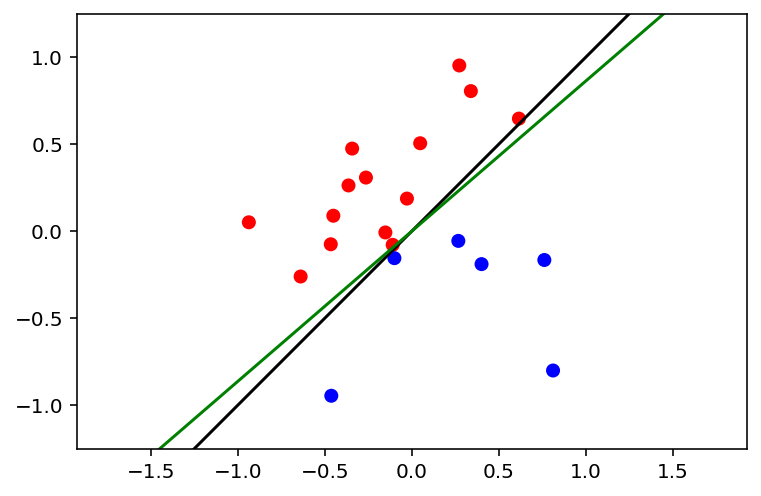

In [8]:
plt.scatter(x[:,0], x[:,1], c=[pColor if y_n >= 0 else nColor for y_n in y]) # plot the points in the dataset
plt.plot(np.linspace(-2,2,50), -(w_t[1]/w_t[2]) * (np.linspace(-2,2,50) -(w_t[0]/w_t[2])), c='k')
plt.plot(np.linspace(-2,2,50), -(w[1]/w[2]) * (np.linspace(-2,2,50) -(w[0]/w[2])), c='g')
plt.axis('equal')
plt.axis([-1.25, 1.25, -1.25, 1.25])
plt.show()

### c.
Repeat everything in b) with another randomly generated dataset of size $20$,
and compare the result to b).

Converged in 380 steps with w = [ 0.          3.27839009 -3.18511226]


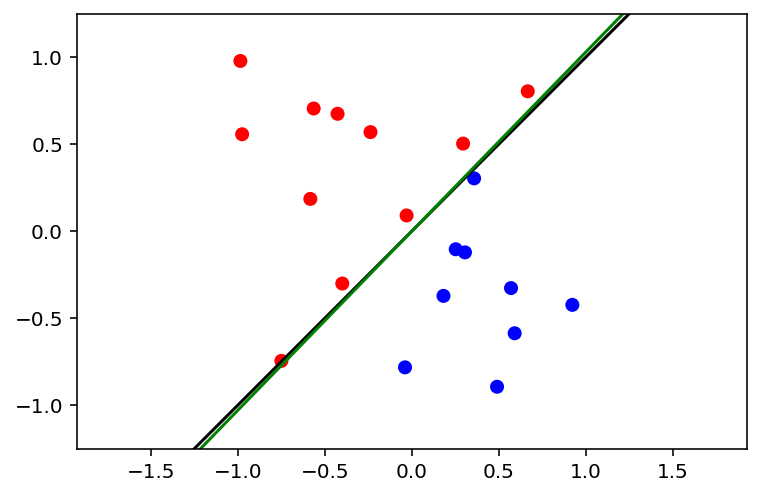

In [9]:
# generate a dataset of points in 2D space from -1 to 1
N = 20
x = (np.random.rand(N,2) * 2) - 1

# create vector of y values (labels) with target function
y = [target(x_n) for x_n in x]

# randomally initialize weights
w = np.zeros(3)
idx = 0

while not test_convergence(w, x, y):
    # pick a random sample
    n = np.random.randint(0,x.shape[0]-1)
    x_n = np.insert(x[n,:], 0, 1)
    y_n = y[n]
    
    if y_n > 0 and np.dot(w, x_n) < 0:
        w += x_n
    
    if y_n < 0 and np.dot(w, x_n) >= 0:
        w -= x_n
    
    idx += 1

print(f"Converged in {idx} steps with w = {w}")

plt.scatter(x[:,0], x[:,1], c=[pColor if y_n >= 0 else nColor for y_n in y]) # plot the points in the dataset
plt.plot(np.linspace(-2,2,50), -(w_t[1]/w_t[2]) * (np.linspace(-2,2,50) - (w_t[0]/w_t[2])), c='k')
plt.plot(np.linspace(-2,2,50), -(w[1]/w[2])     * (np.linspace(-2,2,50) - (w[0]/w[2])), c='g')
plt.axis('equal')
plt.axis([-1.25, 1.25, -1.25, 1.25])
plt.show()


### d. 
Repeat everything in b) with another randomly generated dataset of size $100$,
and compare the result to b).

Converged in 68 steps with w = [ 0.          2.2265524  -2.24598608]


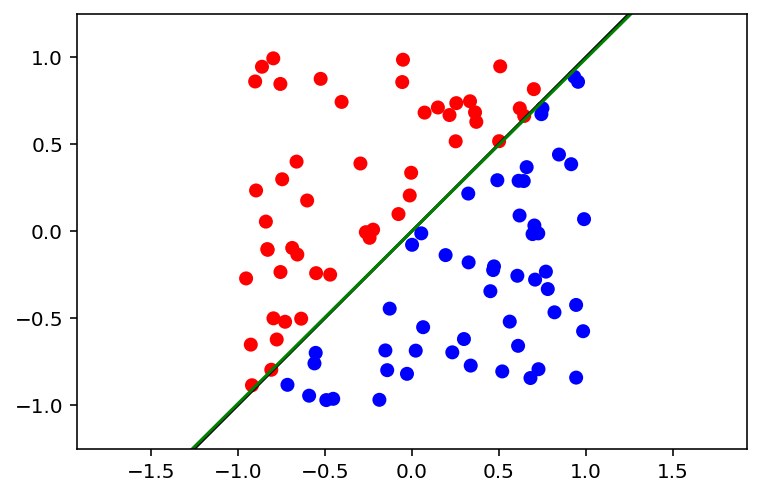

In [10]:
# generate a dataset of points in 2D space from -1 to 1
N = 100
x = (np.random.rand(N,2) * 2) - 1

# create vector of y values (labels) with target function
y = [target(x_n) for x_n in x]

# randomally initialize weights
w = np.zeros(3)
idx = 0

while not test_convergence(w, x, y):
    # pick a random sample
    n = np.random.randint(0,x.shape[0]-1)
    x_n = np.insert(x[n,:], 0, 1)
    y_n = y[n]
    
    if y_n > 0 and np.dot(w, x_n) < 0:
        w += x_n
    
    if y_n < 0 and np.dot(w, x_n) >= 0:
        w -= x_n
    
    idx += 1

print(f"Converged in {idx} steps with w = {w}")

plt.scatter(x[:,0], x[:,1], c=[pColor if y_n >= 0 else nColor for y_n in y]) # plot the points in the dataset
plt.plot(np.linspace(-2,2,50), -(w_t[1]/w_t[2]) * (np.linspace(-2,2,50) - (w_t[0]/w_t[2])), c='k')
plt.plot(np.linspace(-2,2,50), -(w[1]/w[2])     * (np.linspace(-2,2,50) - (w[0]/w[2])), c='g')
plt.axis('equal')
plt.axis([-1.25, 1.25, -1.25, 1.25])
plt.show()

### e. 
Repeat everything in b) with another randomly generated dataset of size $1000$,
and compare the result to b).

Converged in 15300 steps with w = [ 0.          0.50046361 -0.49953639]


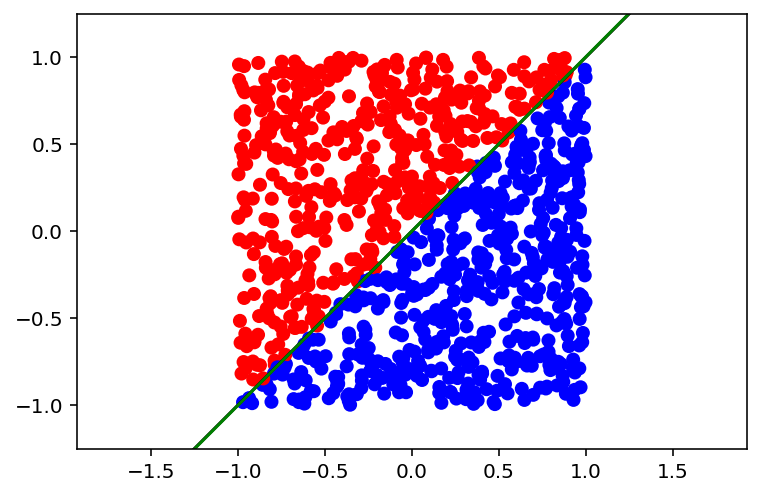

In [11]:
# generate a dataset of points in 2D space from -1 to 1
N = 1000
x = (np.random.rand(N,2) * 2) - 1

# create vector of y values (labels) with target function
y = [target(x_n) for x_n in x]

# randomally initialize weights
w = np.zeros(3)
idx = 0

while True:
    # pick a random sample
    n = np.random.randint(0,x.shape[0]-1)
    x_n = np.insert(x[n,:], 0, 1)
    y_n = y[n]
    
    if y_n > 0 and np.dot(w, x_n) < 0:
        w += x_n
    
    if y_n < 0 and np.dot(w, x_n) >= 0:
        w -= x_n
    
    # check for convergece every 100 steps
    if idx % 100 == 0:
        if test_convergence(w, x, y):
            break
    idx += 1
    
print(f"Converged in {idx} steps with w = {w/np.linalg.norm(w, ord=1)}")

plt.scatter(x[:,0], x[:,1], c=[pColor if y_n >= 0 else nColor for y_n in y]) # plot the points in the dataset
plt.plot(np.linspace(-2,2,50), -(w_t[1]/w_t[2]) * (np.linspace(-2,2,50) - (w_t[0]/w_t[2])), c='k')
plt.plot(np.linspace(-2,2,50), -(w[1]/w[2])     * (np.linspace(-2,2,50) - (w[0]/w[2])), c='g')
plt.axis('equal')
plt.axis([-1.25, 1.25, -1.25, 1.25])
plt.show()

### f. 
Modify the experiment such that $\mathbf{x}_{n} \in \mathbb{R}^{10}$ instead of $\mathbb{R}^{2}$. Run the algorithm
on a randomly generated dataset of size $1000$. How many updates does the
algorithm take to converge?

In [12]:
# generate a dataset of points in 10D space from -1 to 1
N = 1000
x = (np.random.rand(N,10) * 2) - 1

# make a new taget function in R^10
# create a "random" target function
w_t = np.random.rand(11)
def target(x_n):
    return 1 if np.dot(w_t,np.insert(x_n, 0, 1)) >= 0 else -1

# create vector of y values (labels) with target function
y = [target(x_n) for x_n in x]

# initialize weights to 0
w = np.zeros(11)
idx = 0

while True:
    # pick a random sample
    n = np.random.randint(0,x.shape[0]-1)
    x_n = np.insert(x[n,:], 0, 1)
    y_n = y[n]
    
    if y_n > 0 and np.dot(w, x_n) < 0:
        w += x_n
    
    if y_n < 0 and np.dot(w, x_n) >= 0:
        w -= x_n
    
    if idx % 5000 == 0:
        if test_convergence(w, x, y):
            break
    idx += 1
    
print(f"Converged in {idx} steps with w = {w}")

Converged in 575000 steps with w = [18.          5.38726124 52.73765854  1.84783473 30.13083923 61.95136501
 12.56436539  7.0658414  14.5939084  57.73783528  7.7278204 ]


### g. 
Summarize your conclusions regarding the accuracy and running time of the
algorithm as a function of N (the number of data points) and d (the number
of dimensions).

As we increase the number of data points, N, we are able to more closely learn the target function. This is shown when we compare the results from the examples with N=20 vs N=100. In the cases where N=20, once we reach convergence, there is often still a significant difference between the true target function and the function we learn. With N=100 we get fairly close to the true target function, and at N=1000, we learn nearly the same function. 

We also note, that as we increase N and d, run time, or the steps required for convergence increases. This can result in a significant slow down if we check for convergence by iterating over all data points at every step. For this reason we opt to only check for convergence every k steps (in the larger models), since a single step is much less costly than checking for convergence. 